In [ ]:
# Install necessary packages
!pip install gdown plotly pandas

# Download the files using gdown
import gdown

files = {
    '12DyJHUHu2RjduOolcW6L-GRTC3BQYRpZ': 'biengi.bed',
    '12NS-FTtRFM32j1POjFEe0AH7i6Ze_RRI': 'biengi.bim',
    '12HmHDSoAslpQZ-REJnqLS4odML_-rfEu': 'biengi.pedind',
    '12DbtxNZCEvdOzyxHVyrVKRLZMFKNh97f': 'biengi.fam'
}

for file_id, file_name in files.items():
    gdown.download(f'https://drive.google.com/uc?id={file_id}', file_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=12DyJHUHu2RjduOolcW6L-GRTC3BQYRpZ
To: /content/biengi.bed
100%|██████████| 54.2M/54.2M [00:00<00:00, 112MB/s]
Downloading...
From: https://drive.google.com/uc?id=12NS-FTtRFM32j1POjFEe0AH7i6Ze_RRI
To: /content/biengi.bim
100%|██████████| 6.70M/6.70M [00:00<00:00, 40.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=12HmHDSoAslpQZ-REJnqLS4odML_-rfEu
To: /content/biengi.pedind
100%|██████████| 42.0k/42.0k [00:00<00:00, 52.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=12DbtxNZCEvdOzyxHVyrVKRLZMFKNh97f
To: /content/biengi.fam
100%|██████████| 38.0k/38.0k [00:00<00:00, 50.0MB/s]


In [ ]:
!wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20231211.zip

--2024-11-22 15:34:38--  https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20231211.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.93.62, 54.231.196.72, 16.15.216.250, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.93.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8953953 (8.5M) [application/zip]
Saving to: ‘plink_linux_x86_64_20231211.zip’

plink_linux_x86_64_ 100%[===================>]   8.54M  15.1MB/s    in 0.6s    

2024-11-22 15:34:39 (15.1 MB/s) - ‘plink_linux_x86_64_20231211.zip’ saved [8953953/8953953]



In [ ]:
!unzip plink_linux_x86_64_20231211.zip

Archive:  plink_linux_x86_64_20231211.zip
  inflating: plink                   
  inflating: LICENSE                 
  inflating: toy.ped                 
  inflating: toy.map                 
  inflating: prettify                


In [ ]:
!chmod +x plink

In [ ]:
!mv plink /usr/local/bin/

In [ ]:
!plink --version

PLINK v1.90b7.2 64-bit (11 Dec 2023)


In [ ]:
# Run PLINK PCA analysis
!plink --bfile biengi --pca --out biengi_pca

PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to biengi_pca.log.
Options in effect:
  --bfile biengi
  --out biengi_pca
  --pca

12978 MB RAM detected; reserving 6489 MB for main workspace.
242180 variants loaded from .bim file.
894 people (574 males, 320 females) loaded from .fam.
Using up to 2 threads (change this with --threads).
Before main variant filters, 894 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%66%67%68%69%70%71%72%73%74%75%76%

In [ ]:
import pandas as pd

# Load PCA eigenvectors
pca_data = pd.read_csv('biengi_pca.eigenvec', delim_whitespace=True, header=None)
pca_data.columns = ['FID', 'IID'] + [f'PC{i}' for i in range(1, pca_data.shape[1] - 1)]

# Display the first few rows
pca_data.head()

<ipython-input-12-ed508b78036e>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pca_data = pd.read_csv('biengi_pca.eigenvec', delim_whitespace=True, header=None)


,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,4461875510_R01C01,4461875510_R01C01,0.022805,0.046644,0.025682,-0.009200,-0.003159,-0.009250,0.004704,-0.003999,...,0.031829,-0.024709,-0.043020,0.049520,0.081407,0.054900,0.031768,-0.037673,-0.043701,0.016445
1,4461875510_R01C02,4461875510_R01C02,0.029046,0.031433,0.032579,-0.015769,-0.002586,-0.024625,0.003845,-0.007098,...,-0.021524,0.001733,-0.025462,-0.005282,0.023335,0.009862,-0.035812,0.000900,0.003050,0.012582
2,4461875510_R02C01,4461875510_R02C01,0.025890,0.043415,0.024259,-0.010237,-0.005302,-0.018654,0.014151,-0.010939,...,0.042643,-0.042631,-0.014694,0.050725,0.074761,0.093167,0.024564,0.008311,-0.047672,0.038053
3,4461875513_R02C02,4461875513_R02C02,0.022355,0.045329,0.024989,-0.014831,-0.008035,0.001440,0.027770,-0.023837,...,0.038537,-0.021936,0.001573,0.052039,0.107735,0.090628,0.001787,-0.048874,-0.061143,-0.003882
4,4461875513_R01C02,4461875513_R01C02,0.024226,0.043572,0.015883,-0.009853,-0.004136,-0.011679,0.010524,-0.010580,...,0.044584,-0.037172,-0.037817,0.047730,0.075309,0.111941,-0.006808,-0.028436,-0.023186,0.053598


In [ ]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(
    pca_data,
    x='PC1',
    y='PC2',
    color='FID',
    hover_data=['IID'],
    title='PCA: PC1 vs PC2'
)

# Show the interactive plot
fig.show()


In [ ]:
# Download and install Admixture
!wget https://dalexander.github.io/admixture/binaries/admixture_linux-1.3.0.tar.gz
!tar -xvzf admixture_linux-1.3.0.tar.gz

# Navigate to the extracted directory and move the admixture binary
!chmod +x dist/admixture_linux-1.3.0/admixture
!mv dist/admixture_linux-1.3.0/admixture /usr/local/bin/

# Verify installation
!admixture --version

--2024-11-22 15:35:07--  https://dalexander.github.io/admixture/binaries/admixture_linux-1.3.0.tar.gz
Resolving dalexander.github.io (dalexander.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to dalexander.github.io (dalexander.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1916705 (1.8M) [application/gzip]
Saving to: ‘admixture_linux-1.3.0.tar.gz’

admixture_linux-1.3 100%[===================>]   1.83M  --.-KB/s    in 0.05s   

2024-11-22 15:35:07 (37.5 MB/s) - ‘admixture_linux-1.3.0.tar.gz’ saved [1916705/1916705]

dist/admixture_linux-1.3.0/
dist/admixture_linux-1.3.0/README.32.txt
dist/admixture_linux-1.3.0/admixture
dist/admixture_linux-1.3.0/admixture32
dist/admixture_linux-1.3.0/admixture-manual.pdf
****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,       

In [ ]:
import time
from google.colab import files

K_values = [3, 4, 5]
for K in K_values:
    start_time = time.time()  # Record the start time
    print(f"Running ADMIXTURE for K = {K}...")

    # Run the admixture command
    !admixture --cv biengi.bed {K}

    elapsed_time = time.time() - start_time  # Calculate elapsed time
    print(f"Completed ADMIXTURE for K = {K} in {elapsed_time:.2f} seconds.")

    # Download the resulting files
    files.download(f'biengi.{K}.Q')
    files.download(f'biengi.{K}.P')

Running ADMIXTURE for K = 3...
****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Cross-validation will be performed.  Folds=5.
Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 894x242180
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 23.749	Loglikelihood: -2.41596e+08	(delta): 1.07296e+08
2 (EM) 	Elap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running ADMIXTURE for K = 4...
****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Cross-validation will be performed.  Folds=5.
Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 894x242180
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 40.017	Loglikelihood: -2.41608e+08	(delta): 9.46989e+07
2 (EM) 	Elap

<ipython-input-15-9aebb8fc19f6>:9: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



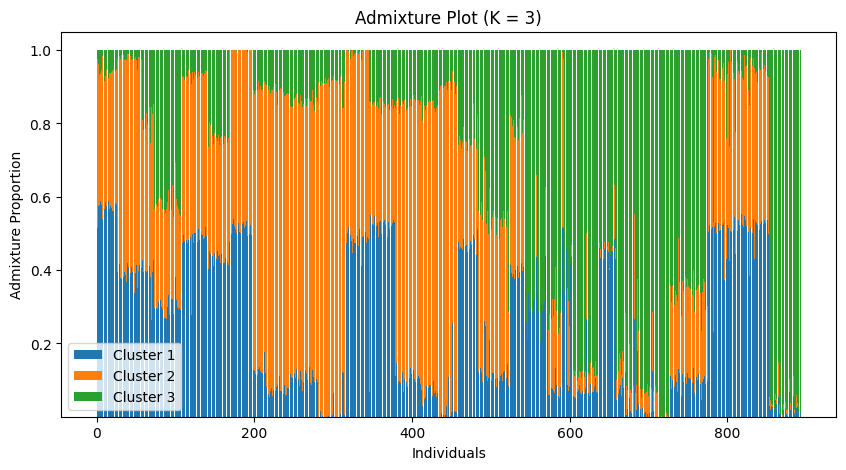

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#K_values = [3]
# Load and visualize Admixture results
for K in K_values:
    q_file = f"biengi.{K}.Q"
    admixture_data = pd.read_csv(q_file, delim_whitespace=True, header=None)

    # Add individual IDs for labeling
    admixture_data['IID'] = pca_data['IID']

    # Plot stacked bar chart
    fig, ax = plt.subplots(figsize=(10, 5))
    bottom_array = np.zeros(admixture_data.shape[0])
    for k in range(K):
        ax.bar(admixture_data.index, admixture_data[k], bottom=bottom_array, label=f'Cluster {k+1}')
        bottom_array += admixture_data[k]

    ax.set_title(f'Admixture Plot (K = {K})')
    ax.set_xlabel('Individuals')
    ax.set_ylabel('Admixture Proportion')
    ax.legend()
    plt.show()